# Explorer le corpus - comparaison avec le fichier README

## Imports

In [1]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## Compter le nombre de documents dans le corpus

In [3]:
path = "../tp4/camille_Dette_Belge_AND_bons_du_tresor_OR_bons_du_tresor/"
files = sorted(os.listdir(path))
len(files)

265

## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [4]:
chaine = 'KB_JB421_1921-03-16_01-00003'
type(chaine)

str

In [5]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['KB', 'JB421', '1921-03-16', '01-00003']

In [6]:
# Accéder à la date
date = chaine_split[2]

# Accéder à l'année
date_split = date.split('-')
year = date_split[0]

In [7]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'192'

In [8]:
year[-1]

'1'

In [9]:
year[:3] + '0s'

'1920s'

## Quelques statistiques

In [10]:
all_years = [str(year) for year in range(1887, 1970)]

In [11]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

In [12]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir et {count_newspapers['JB427']} exemplaires de La Libre Belgique")

Il y a 65 exemplaires du journal Le Soir et 14 exemplaires de La Libre Belgique


In [13]:
print(f"Il y a {count_decade['1930s']} fichiers pour la décennie 1930s")

Il y a 99 fichiers pour la décennie 1930s


In [14]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1887, 1888, 1889, 1891, 1894, 1895, 1896, 1897, 1898, 1902, 1904, 1905, 1906, 1915, 1916, 1917, 1920, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969


## Visualisation du nombre de journaux par mois

Ces visualisations sont obtenues avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

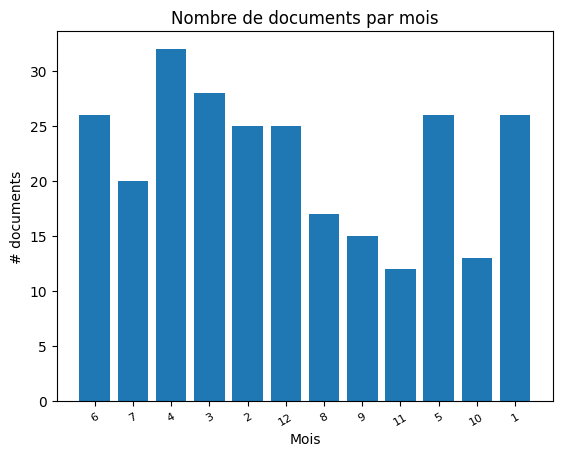

In [15]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [17]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu",'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après',
        'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez',
         'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais',
          'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante',
           'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces',
            'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux',
             'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre',
              'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses',
               'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut',
                'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes',
                 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur',
                  'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non',
                   'nos', 'notre', 'nous', 'on', 'ont', 'ou', 'par', 'pas', 'pendant', 'peut', 'plus',
                    'pour', 'qu', 'que', 'qui', 's', 'sa', 'sans', 'se', 'sera', 'serai', 'seraient',
                     'serais', 'serait', 'seras', 'serez', 'seriez', 'serions', 'serons', 'seront',
                      'ses', 'soient', 'sois', 'soit', 'sommes', 'son', 'sont', 'sous', 'soyez', 'soyons',
                       'suis', 'sur', 't', 'ta', 'te', 'tes', 'toi', 'ton', 'tous', 'tout', 'toutes', 'trois',
                        'tu', 'un', 'une', 'van', 'vos', 'votre', 'vous', 'y', 'à', 'étaient', 'étais', 'était',
                         'étant', 'étante', 'étantes', 'étants', 'étiez', 'étions', 'été', 'étée', 'étées', 'étés',
                          'êtes', 'être']
sw = set(sw)

In [19]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [22]:
# Récupération du contenu du fichier
path = "../tp4/camille_Dette_Belge_AND_bons_du_tresor_OR_bons_du_tresor"
''
limit = 10**8

with open(path) as f:
    text = f.read()[:limit]

PermissionError: [Errno 13] Permission denied: '../tp4/camille_Dette_Belge_AND_bons_du_tresor_OR_bons_du_tresor'

In [ ]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

In [ ]:
words[:10]

## Calculer la taille du vocabulaire

In [ ]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

## Récupérer les mots les plus fréquents et en faire un plot

In [ ]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

In [ ]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [ ]:
fdist.hapaxes()[:30]

## Trouver les mots les plus longs du corpus

In [ ]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

# Extraction de Keywords

## Imports

In [1]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [2]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [3]:
# Lister les Fichiers
data_path = "../tp4/camille_Dette_Belge_AND_bons_du_tresor_OR_bons_du_tresor/"
files = os.listdir(data_path)

In [4]:
# Imprimer le nombre de fichiers identifiés
len(files)

265

In [6]:
# Les dix premiers fichiers
files[:10]

['KB_JB1051_1925-06-03_01-00001.txt',
 'KB_JB1051_1925-07-08_01-00002.txt',
 'KB_JB1051_1926-04-03_01-00002.txt',
 'KB_JB421_1921-03-16_01-00003.txt',
 'KB_JB421_1923-02-14_01-00003.txt',
 'KB_JB421_1925-12-18_01-00002.txt',
 'KB_JB421_1926-08-08_01-00004.txt',
 'KB_JB421_1932-09-24_01-00003.txt',
 'KB_JB421_1932-11-09_01-00003.txt',
 'KB_JB421_1935-05-14_01-00001.txt']

In [7]:
# Choisir un fichier
this_file = files[10]
this_file

'KB_JB421_1937-05-14_01-00002.txt'

In [8]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file),'r', encoding="utf-8").read()
text[:500]

"PAGE DEUX L'A VENIR DU LUXEMBOURG 1+ Mai 1937. ECHOS Le plui ancien chant wallo» M. Henri Grégoire attire l'attention su» un document historique et littéraire de premier ordre que vient de publier M, Haust ; < Une paskêye » ou chant historique de 280 vers, en wallon de la Hesbaye, très proche du Muois* œuvre d'un soldat wallon ayant coopéré à la défense héroïque de Vienne contre l'armée turque (yolllet-septembre 1683). M. Grégoire met en valeur, pat un commentaire historique détaillé, cet insign"

In [9]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('millions', 0.012188040953236704),
 ('Mai', 0.013755509641175917),
 ('Mais', 0.0160480945813719),
 ('jeunes filles', 0.021488988203096807),
 ('jeunes filles arrêtées', 0.021612518104366072),
 ('Colonie', 0.02207827847311156),
 ('Rerum Novarum', 0.022569991071613293),
 ('Loterie Coloniale', 0.023323285117866514),
 ('francs', 0.025329302533918286),
 ('cour', 0.03021356153895284),
 ('VIRTON', 0.03147601445296169),
 ('dollars', 0.03152696585553877),
 ('millions de dollars', 0.03257044754912312),
 ("d'une", 0.03516986114736457),
 ('CATHOLIQUE', 0.035975365924777736),
 ('jeunes', 0.036408384348732316),
 ('partie', 0.03819766418498392),
 ('Mrs', 0.039458325642637695),
 ('Grégoire', 0.044671068016157875),
 ('MARCHE', 0.045217206169102075),
 ('LOTERIE', 0.04572544725325725),
 ('Coloniale', 0.046612422198040404),
 ('Mrs Mosc Smith', 0.0492772419076642),
 ('Mrs Anne Morgan', 0.049512804348101624),
 ('travail', 0.052004103867461016),
 ('CARTON DE TOURNAI', 0.05216658335157045),
 ('Chasseurs Arde

In [10]:
# Ne garder que les bigrammes
# Regarder si la liste contient 2 elements
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['jeunes filles',
 'Rerum Novarum',
 'Loterie Coloniale',
 'Chasseurs Ardennais',
 'francs mais',
 'partie défenderesse',
 'filles arrêtées',
 'Léon XIII']

## Faire la même opération sur tous les documents

In [11]:
#Pour les 10 premiers elements quels sonts les mots cles
for f in sorted(files)[:10]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB1051_1925-06-03_01-00001.txt mentions these keywords: DEUXIEME ANNEE, Conseil général, plan Dawes, dettes belges, dette belge, parti catholique, soi-disant socialiste...
KB_JB1051_1925-07-08_01-00002.txt mentions these keywords: classe ouvrière, millions d'impôts, DRAPEAU ROUGB, Journée Coopérative, dettes qu'ils, DETTE BELGE, ouvrier belge, QU'ILS EXIGENT...
KB_JB1051_1926-04-03_01-00002.txt mentions these keywords: VOIR DEBUT, l'KEMIERE l'AGl, LONGUEURS D'ONDES, films qu'il, films comiques, bon état...
KB_JB421_1921-03-16_01-00003.txt mentions these keywords: Ports Atl, grand match, lundi soir...
KB_JB421_1923-02-14_01-00003.txt mentions these keywords: lieutenant Van, Bulletin météorologique, lord Carnarvon, TEMPS QUIL, dit registre, nouveau registre, lieutenant Willems, major Louvau, lieutenant Pelre...
KB_JB421_1925-12-18_01-00002.txt mentions these keywords: l'Etat Libre, Libre d'Irlande, gouvernement britannique, Tchang Tso, c'est qu'il, nouveaux impôts, qu'il faut, Tso Lin

# Nuages de mots

## Imports et stopwords

In [12]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville","le soir","part","int","dem","app","leurs","terr","min","ecr",
       "ceux","fem","tel","très ","chez","tél","apr","jeu","vers","déja","prés","but","dès","près","peu","déjà","rien","mèn","bel""les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu",'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après',
        'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez',
         'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais',
          'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante',
           'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces',
            'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux',
             'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre',
              'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses',
               'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut',
                'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes',
                 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur',
                  'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non',
                   'nos', 'notre', 'nous', 'on', 'ont', 'ou', 'par', 'pas', 'pendant', 'peut', 'plus',
                    'pour', 'qu', 'que', 'qui', 's', 'sa', 'sans', 'se', 'sera', 'serai', 'seraient',
                     'serais', 'serait', 'seras', 'serez', 'seriez', 'serions', 'serons', 'seront',
                      'ses', 'soient', 'sois', 'soit', 'sommes', 'son', 'sont', 'sous', 'soyez', 'soyons',
                       'suis', 'sur', 't', 'ta', 'te', 'tes', 'toi', 'ton', 'tous', 'tout', 'toutes', 'trois',
                        'tu', 'un', 'une', 'van', 'vos', 'votre', 'vous', 'y', 'à', 'étaient', 'étais', 'était',
                         'étant', 'étante', 'étantes', 'étants', 'étiez', 'étions', 'été', 'étée', 'étées', 'étés',
                          'êtes', 'être']
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [17]:
# Choisir une année
year = 1925

In [18]:
# Lister les fichiers de cette année
data_path = '../tp4'
txt_path = '../tp4/camille_Dette_Belge_AND_bons_du_tresor_OR_bons_du_tresor'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB1051_1925-06-03_01-00001.txt',
 'KB_JB1051_1925-07-08_01-00002.txt',
 'KB_JB421_1925-12-18_01-00002.txt',
 'KB_JB427_1925-06-20_01-00002.txt',
 'KB_JB427_1925-08-26_01-00003.txt',
 'KB_JB555_1925-07-11_01-00001.txt',
 'KB_JB555_1925-08-23_01-00001.txt',
 'KB_JB555_1925-08-26_01-00001.txt',
 'KB_JB567_1925-07-31_01-00001.txt',
 'KB_JB567_1925-11-14_01-00002.txt',
 'KB_JB638_1925-01-25_01-00005.txt',
 'KB_JB638_1925-07-16_01-00001.txt',
 'KB_JB729_1925-05-24_01-00001.txt',
 'KB_JB729_1925-07-08_01-00001.txt',
 'KB_JB729_1925-08-01_01-00003.txt',
 'KB_JB837_1925-01-22_01-00003.txt']

In [19]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r',encoding="utf-8") as f:
        content_list.append(f.read())

In [20]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

16

In [21]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
# A partir de l'element zero
content_list[0][0:200]

'DEUXIEME ANNEE. - N. 130. 20 centimes le numéro i - liflERCRfcDI 3 JUIN 1925, DRAPEAU téléphone .: Administration-Publicité . . ... . . ... ...., 16333 * Rédaction 163.33 » Rédaction {après 19 heures)'

In [22]:
# Ecrire tout le contenu dans un fichier temporaire
# dans lequel qui contiendra tout le contenu de lannee
temp_path = '../tp4/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [23]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding="utf-8") as f:
    before = f.read()

before[:500]

'DEUXIEME ANNEE. - N. 130. 20 centimes le numéro i - liflERCRfcDI 3 JUIN 1925, DRAPEAU téléphone .: Administration-Publicité . . ... . . ... ...., 16333 * Rédaction 163.33 » Rédaction {après 19 heures) 296.89 Adressa télégraphique : DRAPOUGE-BRUXELLEÔ Compte-chèques postaux ; n" 122.595 Organe quotidien du Parti Communiste Beïge (S B I 57-5S Rue dea A»eaens, 57-59 BkO/ŒLLEL> *>, ABONNEMENTS : Belgique, 30 septembre 31 décent > Etranger. 1 an . i t\'abonne dans tous tes, bureaux de punis. Les dette'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [24]:
#garder tous les mots s'ils sont plus grands que 2 lettre et alphabetique

def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [25]:
clean_text(year, folder=temp_path)

'Output has been written in ../tp4/tmp/1925_clean.txt!'

In [26]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding="utf-8") as f:
    after = f.read()

after[:500]

'deuxieme annee centimes numéro liflercrfcdi juin drapeau téléphone administration publicité rédaction rédaction heures adressa télégraphique drapouge bruxelleô compte chèques postaux organe quotidien parti communiste beïge rue dea eaens bko œllel abonnements belgique septembre décent etranger abonne bureaux punis dettes belges envers etats unis inflation main mise américaine industrie belge grâce formidables emprunts contractés etats unis amérique rant guerre capitaliste pondant années suivant a'

## Nuage de mots

### Afficher les termes les plus fréquents


In [27]:
#afficher les mots les plus utilises
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('millions', 163), ('gouvernement', 159), ('belgique', 149), ('bruxelles', 129), ('dette', 117), ('guerre', 107), ('ministre', 104), ('france', 98), ('unis', 94), ('francs', 94)]


### Créer, stocker et afficher le nuage de mots

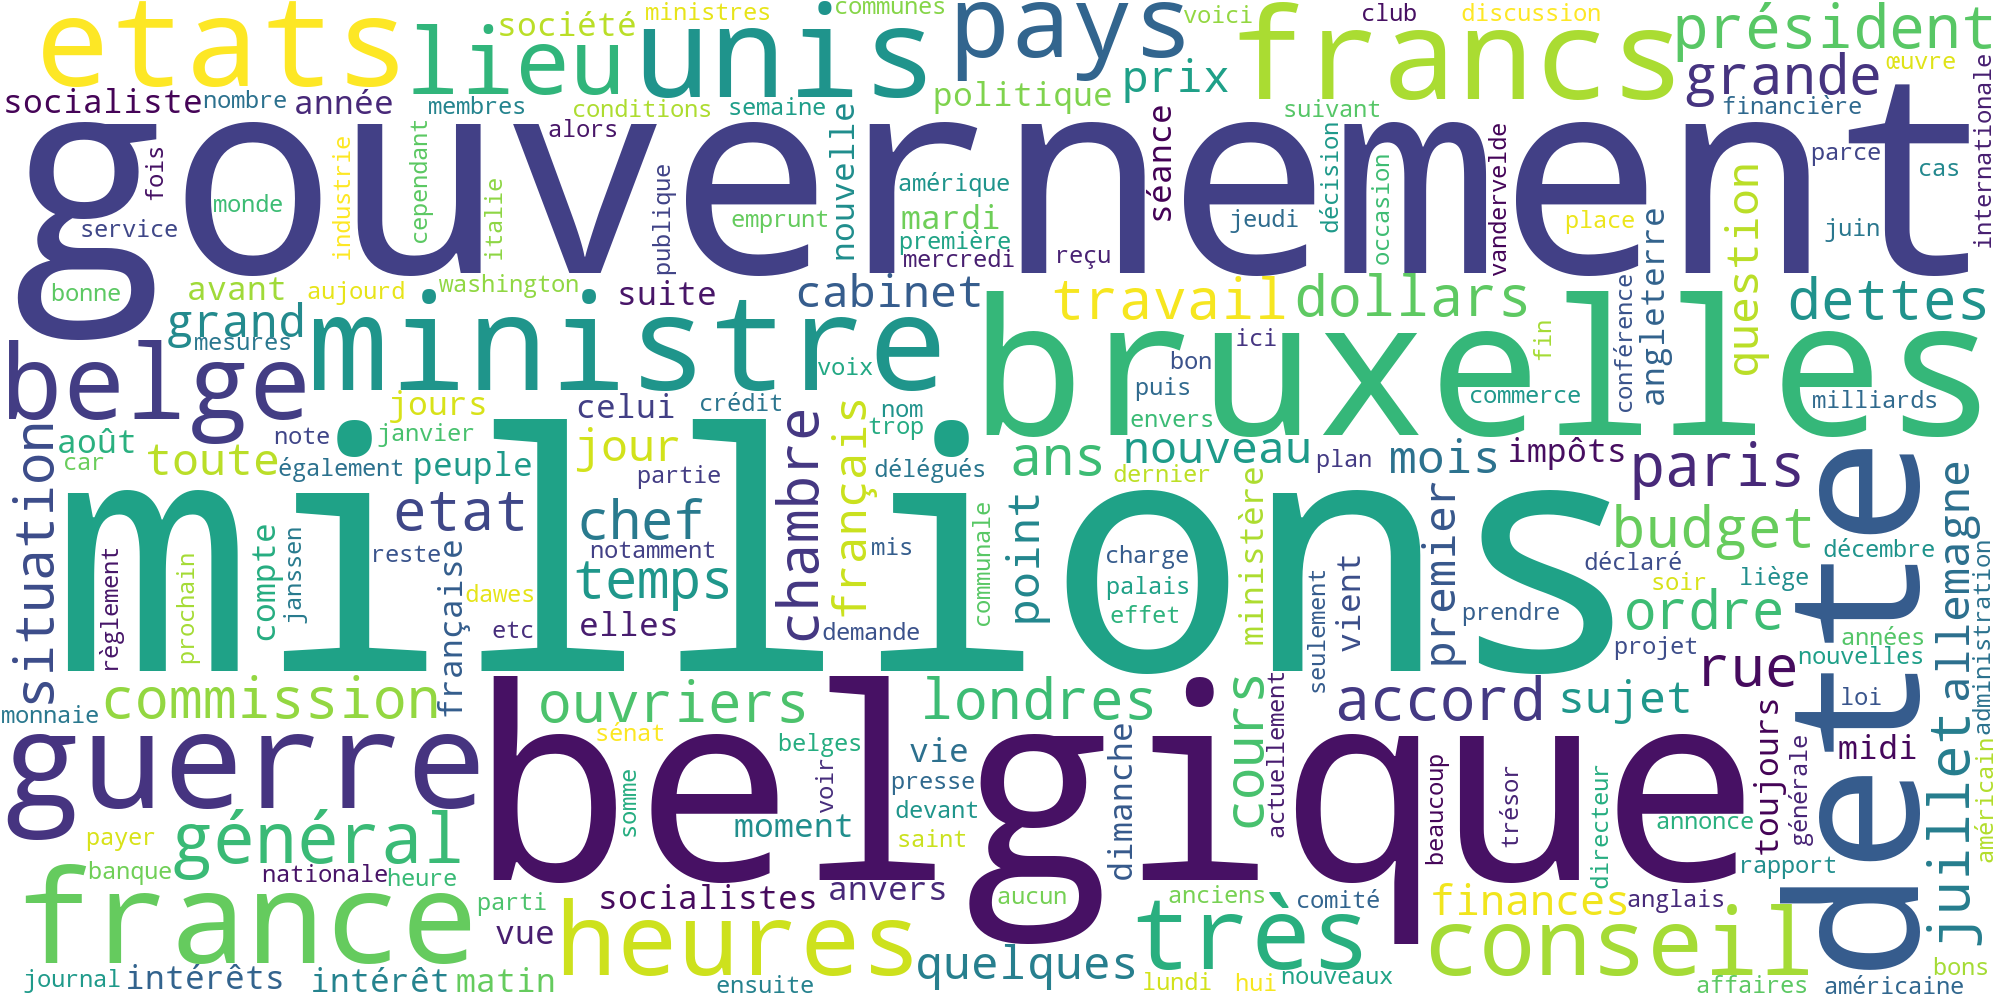

In [28]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

La documentation est accessible ici: https://spacy.io/api

## Imports

In [29]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences
# acteur majeur de TAL

In [30]:
nlp = spacy.load('fr_core_news_md')

## Exemple sur un corpus de test fourni par SpaCy

In [31]:
# Imprimer le corpus de Spacy
sentences

['Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars',
 "Les voitures autonomes déplacent la responsabilité de l'assurance vers les constructeurs",
 "San Francisco envisage d'interdire les robots coursiers sur les trottoirs",
 'Londres est une grande ville du Royaume-Uni',
 'L’Italie choisit ArcelorMittal pour reprendre la plus grande aciérie d’Europe',
 "Apple lance HomePod parce qu'il se sent menacé par l'Echo d'Amazon",
 "La France ne devrait pas manquer d'électricité cet été, même en cas de canicule",
 'Nouvelles attaques de Trump contre le maire de Londres',
 'Où es-tu ?',
 'Qui est le président de la France ?',
 'Où est la capitale des États-Unis ?',
 'Quand est né Barack Obama ?']

In [32]:
# Isoler la première phrase
sent = sentences[0]
sent

'Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars'

In [33]:
# Traiter la phrase avec Spacy
doc = nlp(sent)

In [34]:
type(doc)

spacy.tokens.doc.Doc

In [35]:
doc.text

'Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars'

In [36]:
doc.to_json()

{'text': 'Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars',
 'ents': [{'start': 0, 'end': 5, 'label': 'ORG'}],
 'sents': [{'start': 0, 'end': 33},
  {'start': 33, 'end': 34},
  {'start': 34, 'end': 72}],
 'tokens': [{'id': 0,
   'start': 0,
   'end': 5,
   'tag': 'PROPN',
   'pos': 'PROPN',
   'morph': '',
   'lemma': 'Apple',
   'dep': 'nsubj',
   'head': 1},
  {'id': 1,
   'start': 6,
   'end': 13,
   'tag': 'VERB',
   'pos': 'VERB',
   'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin',
   'lemma': 'cherche',
   'dep': 'ROOT',
   'head': 1},
  {'id': 2,
   'start': 14,
   'end': 15,
   'tag': 'ADP',
   'pos': 'ADP',
   'morph': '',
   'lemma': 'à',
   'dep': 'mark',
   'head': 3},
  {'id': 3,
   'start': 16,
   'end': 23,
   'tag': 'VERB',
   'pos': 'VERB',
   'morph': 'VerbForm=Inf',
   'lemma': 'acheter',
   'dep': 'xcomp',
   'head': 1},
  {'id': 4,
   'start': 24,
   'end': 27,
   'tag': 'DET',
   'pos': 'DET',
   'morph': 'Definite=Ind|Gen

In [37]:
# Appliquer le test sur toutes les phrases
for sent in sentences:
    doc = nlp(sent)
    entities = []
    for ent in doc.ents:
        entities.append(f"{ent.text} ({ent.label_})")
    if entities:
        print(f"'{doc.text}' contient les entités suivantes : {', '.join(entities)}")
    else:
        print(f"'{doc.text}' ne contient aucune entité")

'Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars' contient les entités suivantes : Apple (ORG)
'Les voitures autonomes déplacent la responsabilité de l'assurance vers les constructeurs' ne contient aucune entité
'San Francisco envisage d'interdire les robots coursiers sur les trottoirs' contient les entités suivantes : San Francisco (LOC)
'Londres est une grande ville du Royaume-Uni' contient les entités suivantes : Londres (LOC), Royaume-Uni (LOC)
'L’Italie choisit ArcelorMittal pour reprendre la plus grande aciérie d’Europe' contient les entités suivantes : L’Italie (LOC), ArcelorMittal (ORG), Europe (LOC)
'Apple lance HomePod parce qu'il se sent menacé par l'Echo d'Amazon' contient les entités suivantes : Apple (ORG), HomePod (MISC), Echo (ORG), Amazon (ORG)
'La France ne devrait pas manquer d'électricité cet été, même en cas de canicule' contient les entités suivantes : La France (LOC)
'Nouvelles attaques de Trump contre le maire de Londres' contient les en

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [ ]:
# Charger le texte
n=90000
text = open("../data/all.txt", encoding="utf-8").read()[:n]

In [ ]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 4.72 s
Wall time: 4.73 s


In [ ]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [ ]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Louvel apparait 5 fois dans le corpus
Kilraine apparait 4 fois dans le corpus
Aubertin apparait 4 fois dans le corpus
M. Dubuc apparait 3 fois dans le corpus
M. Bonhomme apparait 3 fois dans le corpus
Reichel apparait 3 fois dans le corpus
M. Finet apparait 3 fois dans le corpus
Finet apparait 3 fois dans le corpus
Morey apparait 2 fois dans le corpus
Pépin apparait 2 fois dans le corpus
Orsini apparait 2 fois dans le corpus
Thérèse apparait 2 fois dans le corpus
Joseph Cox apparait 2 fois dans le corpus
Smith apparait 2 fois dans le corpus
Charles apparait 2 fois dans le corpus
Brigé apparait 2 fois dans le corpus
Pierrot Macabre apparait 2 fois dans le corpus
Molière apparait 2 fois dans le corpus
prince Guillaume apparait 2 fois dans le corpus
frie d’ apparait 1 fois dans le corpus
Isabelle apparait 1 fois dans le corpus
hv/f apparait 1 fois dans le corpus
Coucher apparait 1 fois dans le corpus
erreraient pàs apparait 1 fois dans le corpus
Aubert apparait 1 fois dans le corpus
Auber

# Clustering - Non supervise

## Imports et configuration

In [40]:
# Imports

import collections
import os
import re
import string
import sys
from collections import Counter
from pprint import pprint

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import yake
from nltk import word_tokenize
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
from IPython.display import display
nltk.download('stopwords')

import pandas as pd
from nltk.corpus import stopwords
from scipy.spatial.distance import cosine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

# Config

txt_path = '../tp4/camille_Dette_Belge_AND_bons_du_tresor_OR_bons_du_tresor/'

temp_path = '../tp4/tmp/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [44]:
DECADE = '1929'

files = [f for f in sorted(os.listdir(txt_path)) if f"_{DECADE[:-1]}" in f]

# Vérifier si c'est bien 1925: OK
print(files[:5])

texts = [open(txt_path + f, "r", encoding="utf-8").read() for f in files]

# Pour voir à quoi ressemble le premier document: tout est OK
print(texts[0][:400])

['KB_JB1051_1925-06-03_01-00001.txt', 'KB_JB1051_1925-07-08_01-00002.txt', 'KB_JB1051_1926-04-03_01-00002.txt', 'KB_JB421_1921-03-16_01-00003.txt', 'KB_JB421_1923-02-14_01-00003.txt']
DEUXIEME ANNEE. - N. 130. 20 centimes le numéro i - liflERCRfcDI 3 JUIN 1925, DRAPEAU téléphone .: Administration-Publicité . . ... . . ... ...., 16333 * Rédaction 163.33 » Rédaction {après 19 heures) 296.89 Adressa télégraphique : DRAPOUGE-BRUXELLEÔ Compte-chèques postaux ; n" 122.595 Organe quotidien du Parti Communiste Beïge (S B I 57-5S Rue dea A»eaens, 57-59 BkO/ŒLLEL> *>, ABONNEMENTS : Belgi


## Vectoriser les documents à l'aide de TF-IDF

In [46]:
# Création d'une fonction de pré-traitement

def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

# Instancier le modèle TF-IDF avec ses arguments

vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.9, #ignorer les mots apparaissant dans plus de 90% des docs
    min_df=0.1, #ignorer les mots apparaissant dans moins de 10% des docs
    lowercase=True #tout mettre en minuscules
)

# Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

tfidf_vectors = vectorizer.fit_transform(texts)

In [48]:
# Imprimer les détails de la matrice

tfidf_vectors

<89x5008 sparse matrix of type '<class 'numpy.float64'>'
	with 104750 stored elements in Compressed Sparse Row format>

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

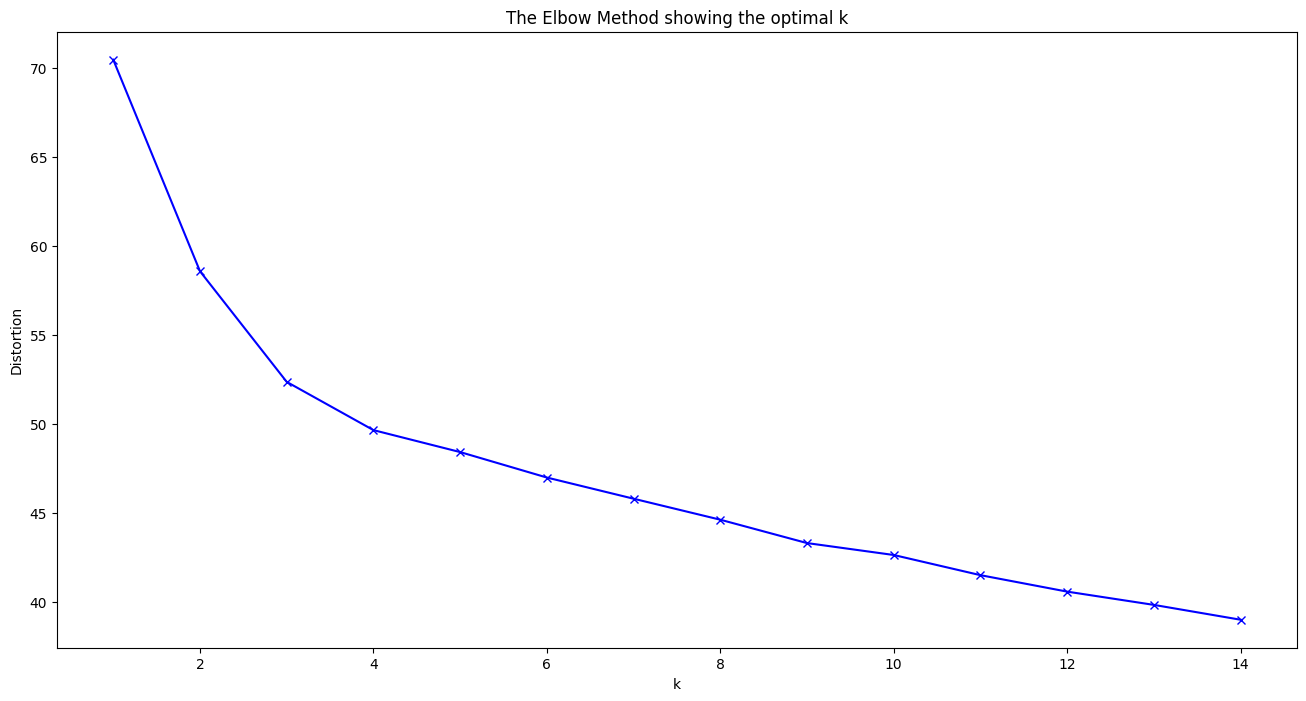

In [49]:
# Elbow method pour déterminer le nbre de clusters optimal

distortions = []
K = range(1,15) #tested:1-10, 1-15, 1-30
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf_vectors)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [50]:
# Nbre clusters

N_CLUSTERS = 4

# Instancier le modèle K-Means et ses arguments

km_model = KMeans(n_clusters=N_CLUSTERS)

# Appliquer le clustering à l'aide de la fonction fit_predict

clusters = km_model.fit_predict(tfidf_vectors)

clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [51]:
# Afficher le résultat du clustering (un dictionnaire)

dict(clustering)

{0: ['KB_JB1051_1925-06-03_01-00001.txt',
  'KB_JB1051_1925-07-08_01-00002.txt',
  'KB_JB1051_1926-04-03_01-00002.txt',
  'KB_JB421_1925-12-18_01-00002.txt',
  'KB_JB427_1921-05-20_01-00002.txt',
  'KB_JB427_1925-06-20_01-00002.txt',
  'KB_JB427_1925-08-26_01-00003.txt',
  'KB_JB427_1927-09-23_01-00001.txt',
  'KB_JB427_1929-02-17_01-00001.txt',
  'KB_JB555_1925-07-11_01-00001.txt',
  'KB_JB555_1925-08-23_01-00001.txt',
  'KB_JB555_1925-08-26_01-00001.txt',
  'KB_JB555_1926-04-11_01-00001.txt',
  'KB_JB555_1926-07-08_01-00001.txt',
  'KB_JB567_1922-10-31_01-00001.txt',
  'KB_JB567_1925-07-31_01-00001.txt',
  'KB_JB567_1925-11-14_01-00002.txt',
  'KB_JB567_1926-01-18_01-00001.txt',
  'KB_JB567_1926-01-19_01-00001.txt',
  'KB_JB567_1926-02-25_01-00002.txt',
  'KB_JB567_1926-04-23_01-00001.txt',
  'KB_JB572_1924-05-27_01-00001.txt',
  'KB_JB572_1926-07-09_01-00003.txt',
  'KB_JB572_1927-09-24_01-00001.txt',
  'KB_JB638_1925-07-16_01-00001.txt',
  'KB_JB638_1926-04-03_01-00001.txt',
  'KB_

## Visualiser les clusters

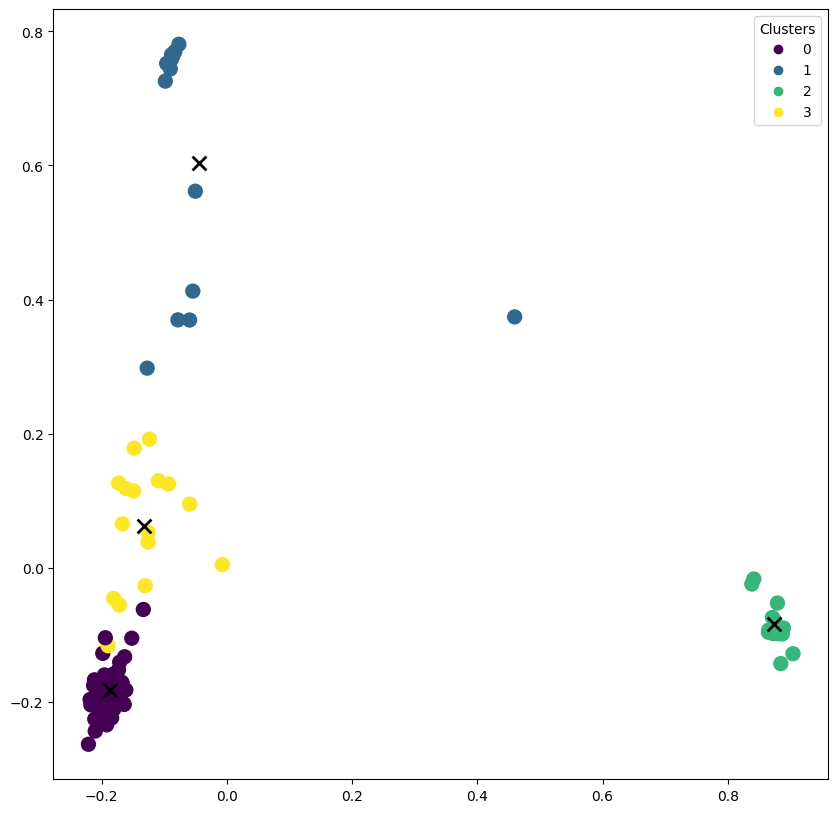

In [52]:
# Réduire les vecteurs à 2 dimensions

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

# Générer le graphe

x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

## Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

## Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

## Explorer les clusters

In [53]:
# Créer des fichiers tmp avec les textes des clusters

for key in clustering.keys():
    
    tmp_content_list = []

    for txt in clustering[key]:
        
        with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
            tmp_content_list.append(f.read())
        
    with open(os.path.join(temp_path, f'{DECADE}s_cluster_{key}.txt'), 'w', encoding="utf-8") as f:
        f.write(' '.join(tmp_content_list))   

### Autour des fichiers

In [54]:
# Regarder le nombre de documents par cluster

for key in clustering.keys():
    print(f"Nombre de documents dans le cluster {key} : {len(clustering[key])}")

Nombre de documents dans le cluster 0 : 46
Nombre de documents dans le cluster 1 : 14
Nombre de documents dans le cluster 3 : 16
Nombre de documents dans le cluster 2 : 13


Cluster n° 0, Nbre doc : 46, Counter({'1926': 17, '1925': 13, '1927': 5, '1051': 3, '1921': 2, '1922': 2, '1923': 2, '1929': 1, '1924': 1})


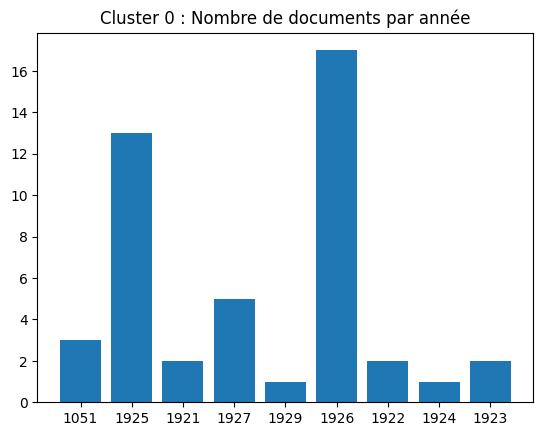

Cluster n° 1, Nbre doc : 14, Counter({'1927': 9, '1921': 2, '1926': 1, '1925': 1, '1922': 1})


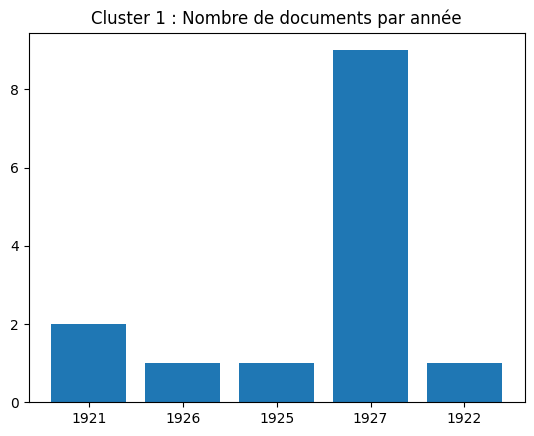

Cluster n° 3, Nbre doc : 16, Counter({'1926': 8, '1923': 3, '1927': 3, '1921': 2})


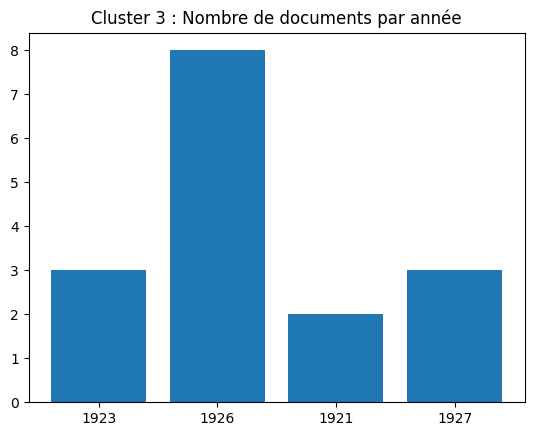

Cluster n° 2, Nbre doc : 13, Counter({'1927': 8, '1921': 2, '1924': 1, '1928': 1, '1929': 1})


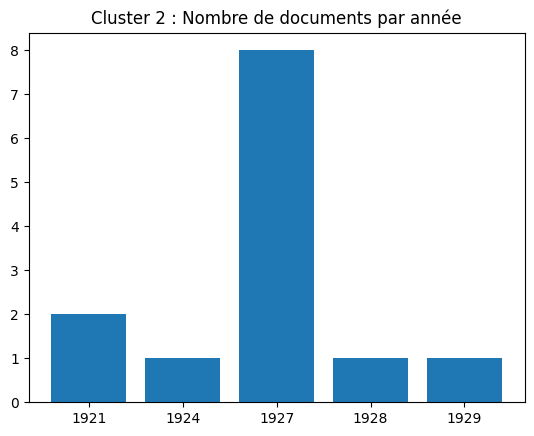

In [55]:
# Regarder la distribution des clusters selon les années

# Fonction basée autour d'une regex pour détecter l'année dans un nom de fichier
def get_year(filename):
    year = (re.search("([0-9]{4})", filename)).group()
    return year

# Création d'une liste de listes pour stocker les années pour chaque cluster
years_per_cluster = []
for key in clustering.keys():
    years_per_cluster.append([])

# Double boucle pour ajouter l'année pour chaque cluster
for key in clustering.keys():
    for i in clustering[key]:
        years_per_cluster[key].append(get_year(i))
    
    # testing
    # print(key, len(years_per_cluster[key]))

# testing
# print(years_per_cluster[0].count('1932'))

# Créer des graphes pour chaque cluster, en utilisant Counter pour compter le nbre de fichiers par années dans la liste de listes
for key in clustering.keys():
    tmp_counter = Counter(years_per_cluster[key])
    print(f"Cluster n° {key},", f"Nbre doc : {len(clustering[key])},", tmp_counter)

    plt.bar(tmp_counter.keys(), tmp_counter.values())
    plt.title(f"Cluster {key} : Nombre de documents par année")
    plt.show()

### Keywords

4 cellules distinctes et non une boucle _for_ comme ci-dessus et ci-dessous car, pour une raison étrange, la boucle tourne "dans le vide" tandis que les cellules indépendantes donnent un résultat (après un long moment pour celle qui traite le plus gros cluster).

In [56]:
# Regarder les mots-clés de chaque cluster

# Instantier l'extracteur de mots clés en fr + les 50 premiers
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

# Récupérer le texte sauvegardé ci-dessus
text = open(os.path.join(temp_path, f'{DECADE}s_cluster_0.txt'), 'r', encoding="utf-8").read()

# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
print(f"Keywords, cluster n° 0 : {keywords}")

# Ne garder que les bigrammes / trigrammes
kept_bigrams = []
kept_trigrams = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2: # si c'est un bigramme
        kept_bigrams.append(kw)
    elif len(words) == 3: # si c'est un trigramme
        kept_trigrams.append(kw)

print(f"Bigrammes récurrents, cluster n° 0 : {kept_bigrams}")
print(f"Trigrammes récurrents, cluster n° 0 : {kept_trigrams}")
print("")

Keywords, cluster n° 0 : [('dette belge', 0.00010326943084205767), ('Belgique', 0.00011236609299116631), ("qu'il", 0.00012308320396016987), ('gouvernement', 0.0001261733901825117), ("c'est", 0.00013257261082238038), ('Bruxelles', 0.0001438274998430687), ('gouvernement belge', 0.00020904943884249224), ('France', 0.0002144771161320392), ('Chambre', 0.00024384317016870065), ("gouvernement belge s'est", 0.00025331331818416924), ('millions', 0.0002595375508782393), ("d'un", 0.00026070227976339114), ('Banque Nationale', 0.0002684964990147011), ('dette', 0.00027954151211629784), ('belge', 0.00030828552518491806), ('ministre', 0.0003163411645911482), ("d'une", 0.0003325251214194548), ('Conseil', 0.00033937065646532787), ("DETTE BELGE QU'ILS", 0.0003677097323447932), ('faire', 0.000378438710477941), ('Paris', 0.0004444222661247284), ("qu'ils", 0.0004702880628925893), ('francs', 0.0004874735807564587), ('LONDRES', 0.0005039393676005287), ('Conseil général', 0.000509178352937772), ('pays', 0.0006

In [57]:
# Regarder les mots-clés de chaque cluster et voir s'il y a des éléments intéressants qui en ressortent 
# (pourquoi pas leur attribuer un "thème")

# Instantier l'extracteur de mots clés en fr + les 50 premiers
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

# Récupérer le texte sauvegardé ci-dessus
text = open(os.path.join(temp_path, f'{DECADE}s_cluster_1.txt'), 'r', encoding="utf-8").read()

# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
print(f"Keywords, cluster n° 1 : {keywords}")

# Ne garder que les bigrammes / trigrammes
kept_bigrams = []
kept_trigrams = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2: # si c'est un bigramme
        kept_bigrams.append(kw)
    elif len(words) == 3: # si c'est un trigramme
        kept_trigrams.append(kw)

print(f"Bigrammes récurrents, cluster n° 1 : {kept_bigrams}")
print(f"Trigrammes récurrents, cluster n° 1 : {kept_trigrams}")
print("")

Keywords, cluster n° 1 : [('Immobilières Banque Belge', 0.00023013553296732228), ('Congo', 0.00025444704572164396), ('Nord Charleroi Nord', 0.0002652949971387784), ('Congo Belge', 0.00028094033595749715), ('COURS COURS COURS', 0.00029242635594453045), ('Bruxelles', 0.0003312651290933593), ('Nord', 0.00034585918349944736), ('BANQUE CHAUDOIR Société', 0.0003780764340957617), ('Liège', 0.0004035941720944233), ('Banque Belge', 0.0004184696503939163), ('Banque', 0.0004543468765253537), ('belge', 0.0004633721312979256), ('Crédit Général', 0.0004806887375341547), ('Lin', 0.00048158277344851426), ('TERME COURS COURS', 0.00048258537422869675), ('Pays Liège', 0.0005090728961621358), ('gaz', 0.0005558601589620113), ('ind', 0.0006020636766318363), ('fer', 0.0006111665265130904), ('Crédit Général Liégeois', 0.0006219282255162139), ('Anvers', 0.0006438247131280749), ('Crédit Général Congo', 0.0006510558223293854), ('Banque Générale Belge', 0.0006942977586542351), ('Crédit Com', 0.0007277706572932713

In [58]:
# Regarder les mots-clés de chaque cluster et voir s'il y a des éléments intéressants qui en ressortent 
# (pourquoi pas leur attribuer un "thème")

# Instantier l'extracteur de mots clés en fr + les 50 premiers
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

# Récupérer le texte sauvegardé ci-dessus
text = open(os.path.join(temp_path, f'{DECADE}s_cluster_2.txt'), 'r', encoding="utf-8").read()

# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
print(f"Keywords, cluster n° 2 : {keywords}")

# Ne garder que les bigrammes / trigrammes
kept_bigrams = []
kept_trigrams = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2: # si c'est un bigramme
        kept_bigrams.append(kw)
    elif len(words) == 3: # si c'est un trigramme
        kept_trigrams.append(kw)

print(f"Bigrammes récurrents, cluster n° 2 : {kept_bigrams}")
print(f"Trigrammes récurrents, cluster n° 2 : {kept_trigrams}")
print("")

Keywords, cluster n° 2 : [('cours', 0.000299594453478975), ('marché', 0.00048376178480868205), ('Bruxelles', 0.00048659723090084057), ('Société', 0.0005429531654294889), ('BOURSE BRUXELLES BRUXELLES', 0.0007728659151344491), ('prix', 0.0008116824850446161), ('Société Générale', 0.000868119930365302), ('capital', 0.0008914975142407972), ('francs', 0.0009041928981231009), ('rue', 0.0009516335715437094), ('COURS Société Générale', 0.000963598334807316), ('Marchés d’Anvers COURS', 0.0009638979539238457), ('marché reste', 0.0010824807755562959), ('mars', 0.0011042125271665225), ('Société Auxiliaire Financière', 0.001131357485919504), ('Société Nationale', 0.0011802433180221259), ('rue Royale', 0.0011962009744336877), ('disp', 0.0012330119494001002), ('titres', 0.0012548760927440137), ('demande', 0.001269491672804631), ('d’un', 0.0013778931045483056), ('belge', 0.0014404130009073094), ('dette belge', 0.0014683748031848734), ('banque', 0.001497774770423677), ('CHEMINS DE FER', 0.0015132535359

In [59]:
# Regarder les mots-clés de chaque cluster et voir s'il y a des éléments intéressants qui en ressortent (pourquoi pas leur attribuer un "thème")

# Instantier l'extracteur de mots clés en fr + les 50 premiers
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

# Récupérer le texte sauvegardé ci-dessus
text = open(os.path.join(temp_path, f'{DECADE}s_cluster_3.txt'), 'r', encoding="utf-8").read()

# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
print(f"Keywords, cluster n° 3 : {keywords}")

# Ne garder que les bigrammes / trigrammes
kept_bigrams = []
kept_trigrams = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2: # si c'est un bigramme
        kept_bigrams.append(kw)
    elif len(words) == 3: # si c'est un trigramme
        kept_trigrams.append(kw)

print(f"Bigrammes récurrents, cluster n° 3 : {kept_bigrams}")
print(f"Trigrammes récurrents, cluster n° 3 : {kept_trigrams}")
print("")

Keywords, cluster n° 3 : [('actions privilégiées', 4.684852863336014e-05), ('Société Nationale', 7.609178411670496e-05), ('Banque Nationale', 0.00012728632226462734), ('Fer Belges', 0.00016530650583815654), ('dites actions privilégiées', 0.00017001400700968056), ('Chemins de Fer', 0.00022025088167055242), ('action privilégiée amortie', 0.0002781353606965028), ('francs', 0.0002916101447475077), ('Bruxelles', 0.00029768873981278395), ('actions', 0.00031069841365018554), ("privilégiées d'une valeur", 0.00034213472575616416), ('actions privilégiées chemins', 0.00034602324308712106), ('Société', 0.0003771282634595566), ('actions privilégiées définitives', 0.0003860135275561564), ('Privilégiées', 0.00048048952169289474), ('Banque', 0.0005044566121003033), ('bons', 0.0005064367711410417), ("millions d'actions privilégiées", 0.0005302538142310389), ('Dette Belge', 0.0005856392661683223), ('action privilégiée', 0.0005919950436397327), ('bons du trésor', 0.0006044449062006084), ('Nationale', 0.0

### Nuage de mots

In [61]:
# Stopwords
sw = stopwords.words("french")
sw += [
    # Coquilles OCR pas enlevées par fonction de nettoyage
    "brux", "belg", "cond", "intér","télép", "téléph", "parf", "aven", "épous", "lntér", "poli", "référ", "culs", "serv", "trav", "pers", "conf", "sach", "conn", "cuis", "chauf", "chauff", "journ", "cherc", "flam", "exlg", "ouvr", "prop", "meub", "domest", "chaus", "préf", "angl", "inst", "repr", "jard", "chamb", "terr", "franç", "élect", "conv", "rapp", "centr", "atel", "plac", "appartem", "coch", "tranq", "pled", "compr", "schaerb", "condlt", "adres", "aujourd", "couch", "compt", "pens", "exig", "conc", "comp", "situât", "merc", "gara", "couch", "charlerol",
    # Mots (quasiment) vides de sens
    "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous", "celle", "entre", "encore", "toutes", "toute", "pendant", "moins", "dire", "voir", "cela", "non", "faut", "trois", "quatre", "cinq", "quart", "demi", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres", "van", "het", "autre", "jusqu", "très", "trop", "chez", "près", "toutes", "leurs", "avant", "suite", "rien", "quelques", "puis", "alors", "quand", "ceux", "elles", "déjà", "celui", "devant", "toujours", "outre", "tant", "mieux", "assez", "beaucoup", "plusieurs", "quelque", "quelques", "vers", "ensuite", "voici", "notamment", "chaque", "laquelle", "parmi",
    # Mots pas pertinents dans le contexte du journal
    "rossel", "agence", "nord", "midi", "royale", "ville", "avenue", "place", "boulevard", "chaussée", "saint", "octobre", "mardi", "août", "dimanche", "septembre", "lundi", "décembre", "janvier", "juin", "avril", "mercredi", "samedi", "novembre", "jeudi", "vendredi"]
sw = set(sw)

# Fonction de nettoyage

def clean_text(key, folder=None):
    if folder is None:
        input_path = f"{DECADE}s_cluster_{key}.txt"
        output_path = f"{DECADE}s_cluster_{key}_clean.txt"
    else:
        input_path = f"{folder}{DECADE}s_cluster_{key}.txt"
        output_path = f"{folder}{DECADE}s_cluster_{key}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 3 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [62]:
# Appliquer la fonction et vérifier les résultats

for key in clustering.keys():

    clean_text(key, folder=temp_path)

    with open(os.path.join(temp_path, f'{DECADE}s_cluster_{key}_clean.txt'), 'r', encoding="utf-8") as f:
        after = f.read()

    # Calculer les mots les plus fréquents et afficher les résultats

    frequencies = Counter(after.split())

    print(f"Cluster n° {key} :", frequencies.most_common(200))
    print("")

    cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
    cloud.to_file(os.path.join(temp_path, f"{DECADE}s_cluster_{key}.png"))

Cluster n° 0 : [('gouvernement', 448), ('millions', 369), ('belgique', 311), ('bruxelles', 293), ('ministre', 286), ('dette', 279), ('belge', 250), ('francs', 245), ('pays', 240), ('guerre', 233), ('france', 222), ('heures', 210), ('etat', 205), ('chambre', 200), ('conseil', 194), ('grand', 191), ('lieu', 189), ('accord', 184), ('mois', 181), ('général', 176), ('président', 175), ('question', 166), ('jour', 166), ('temps', 165), ('grande', 162), ('politique', 152), ('commission', 152), ('point', 152), ('paris', 151), ('part', 150), ('français', 150), ('situation', 149), ('etats', 148), ('compte', 147), ('cours', 145), ('unis', 141), ('allemagne', 141), ('londres', 138), ('travail', 137), ('budget', 136), ('vient', 135), ('sujet', 134), ('matin', 134), ('ordre', 132), ('nationale', 129), ('nouveau', 128), ('moment', 127), ('prix', 126), ('jours', 123), ('dettes', 121), ('société', 121), ('projet', 121), ('belges', 120), ('finances', 118), ('ouvriers', 115), ('milliards', 114), ('bons', 

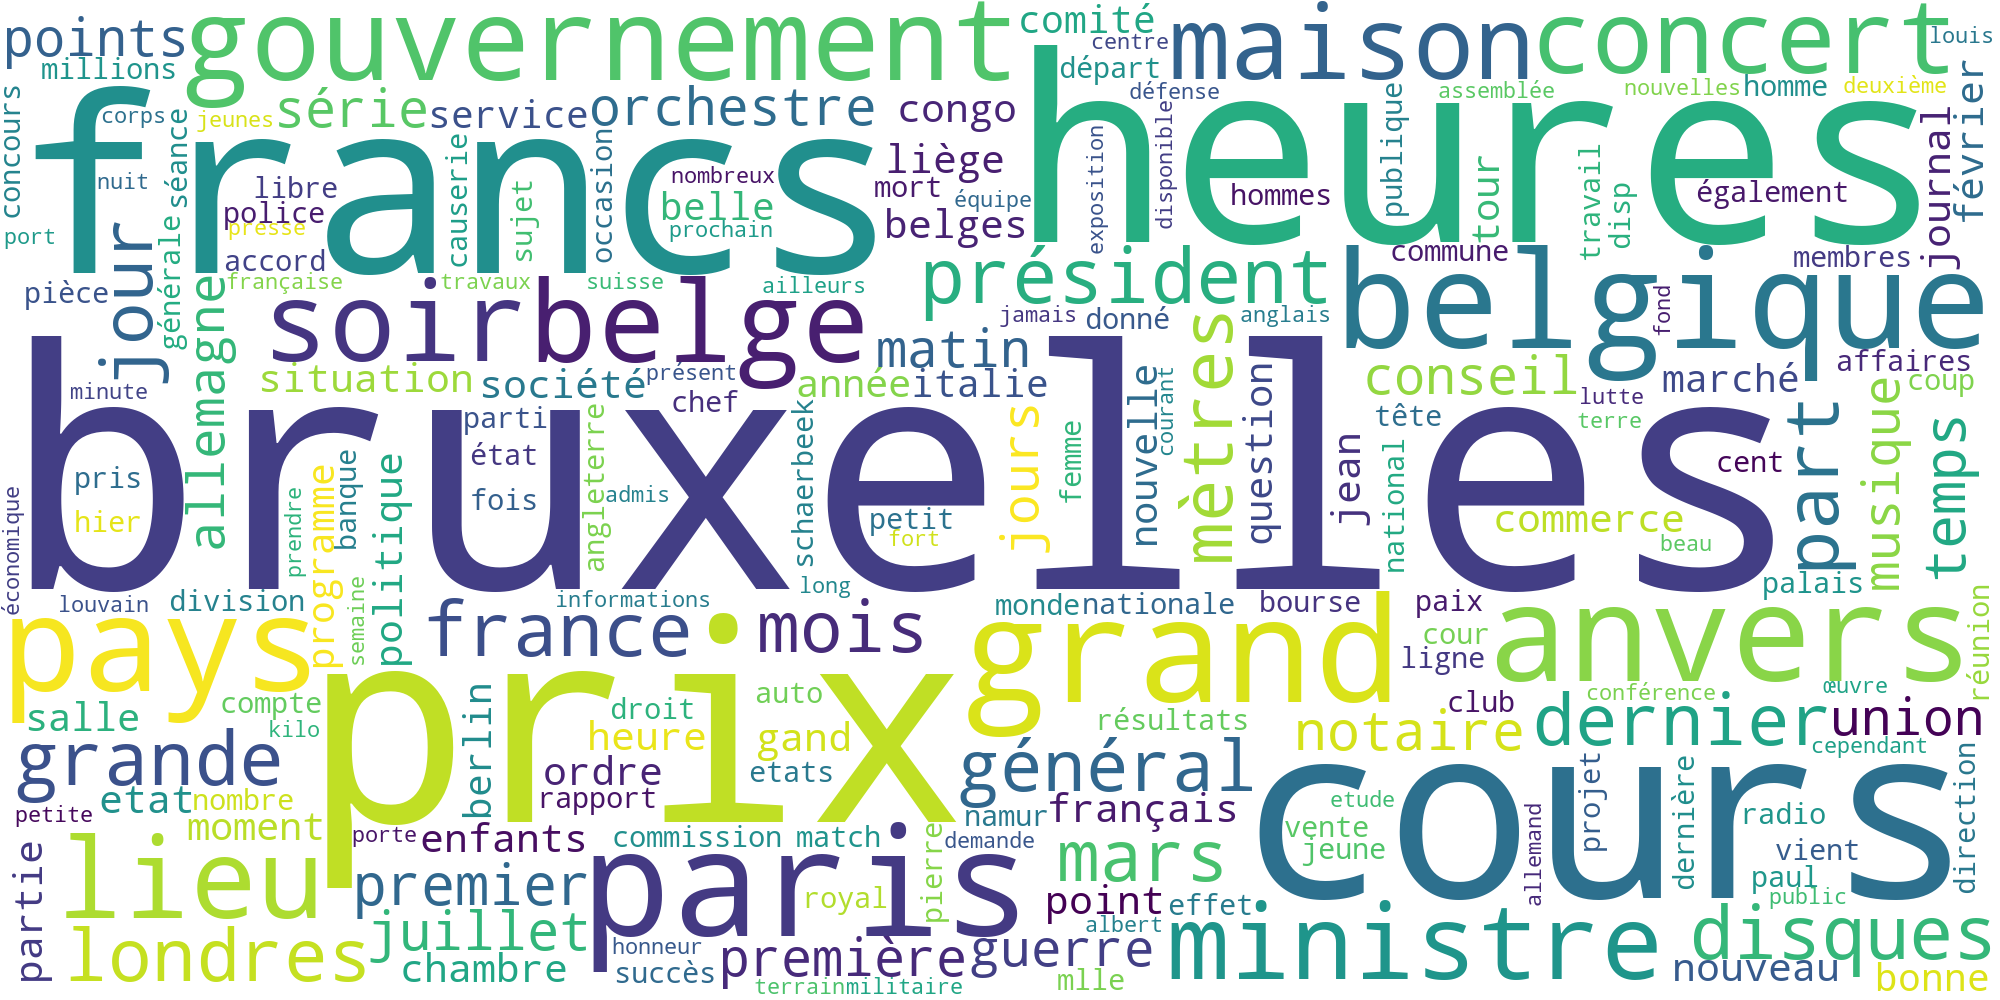

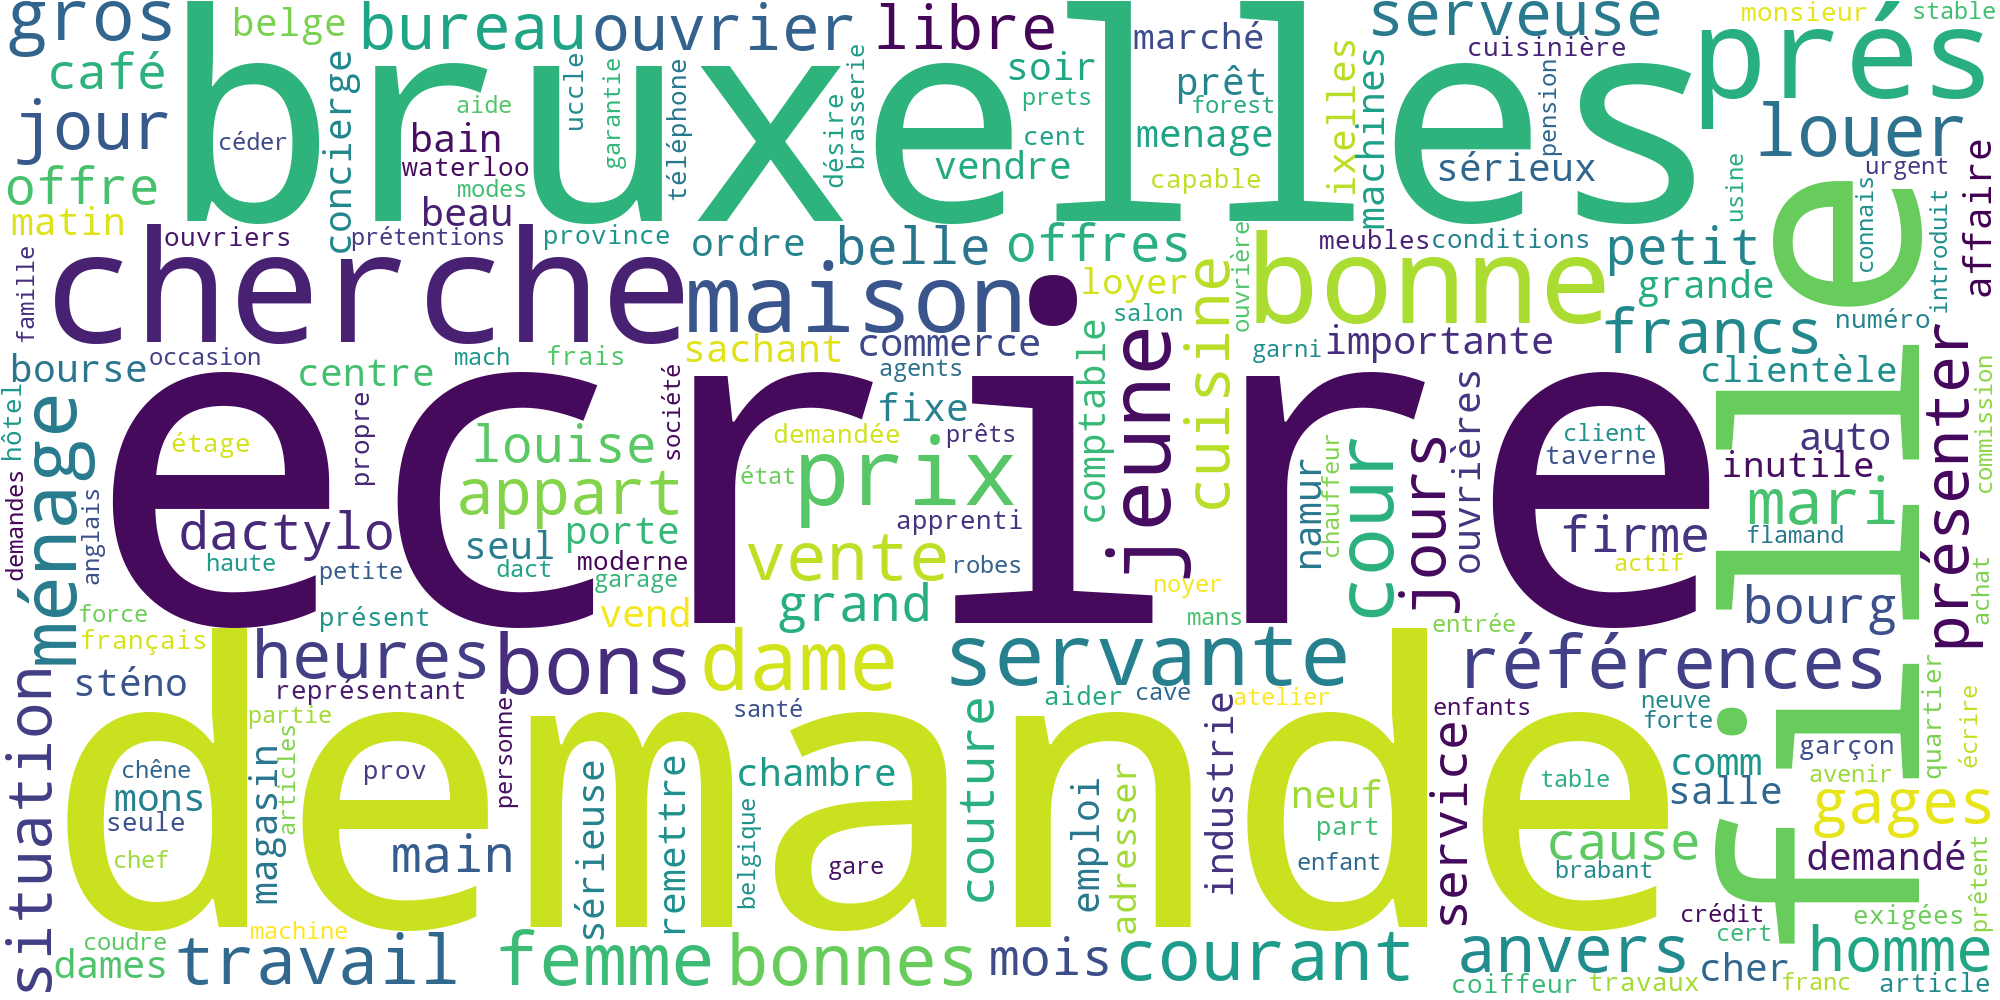

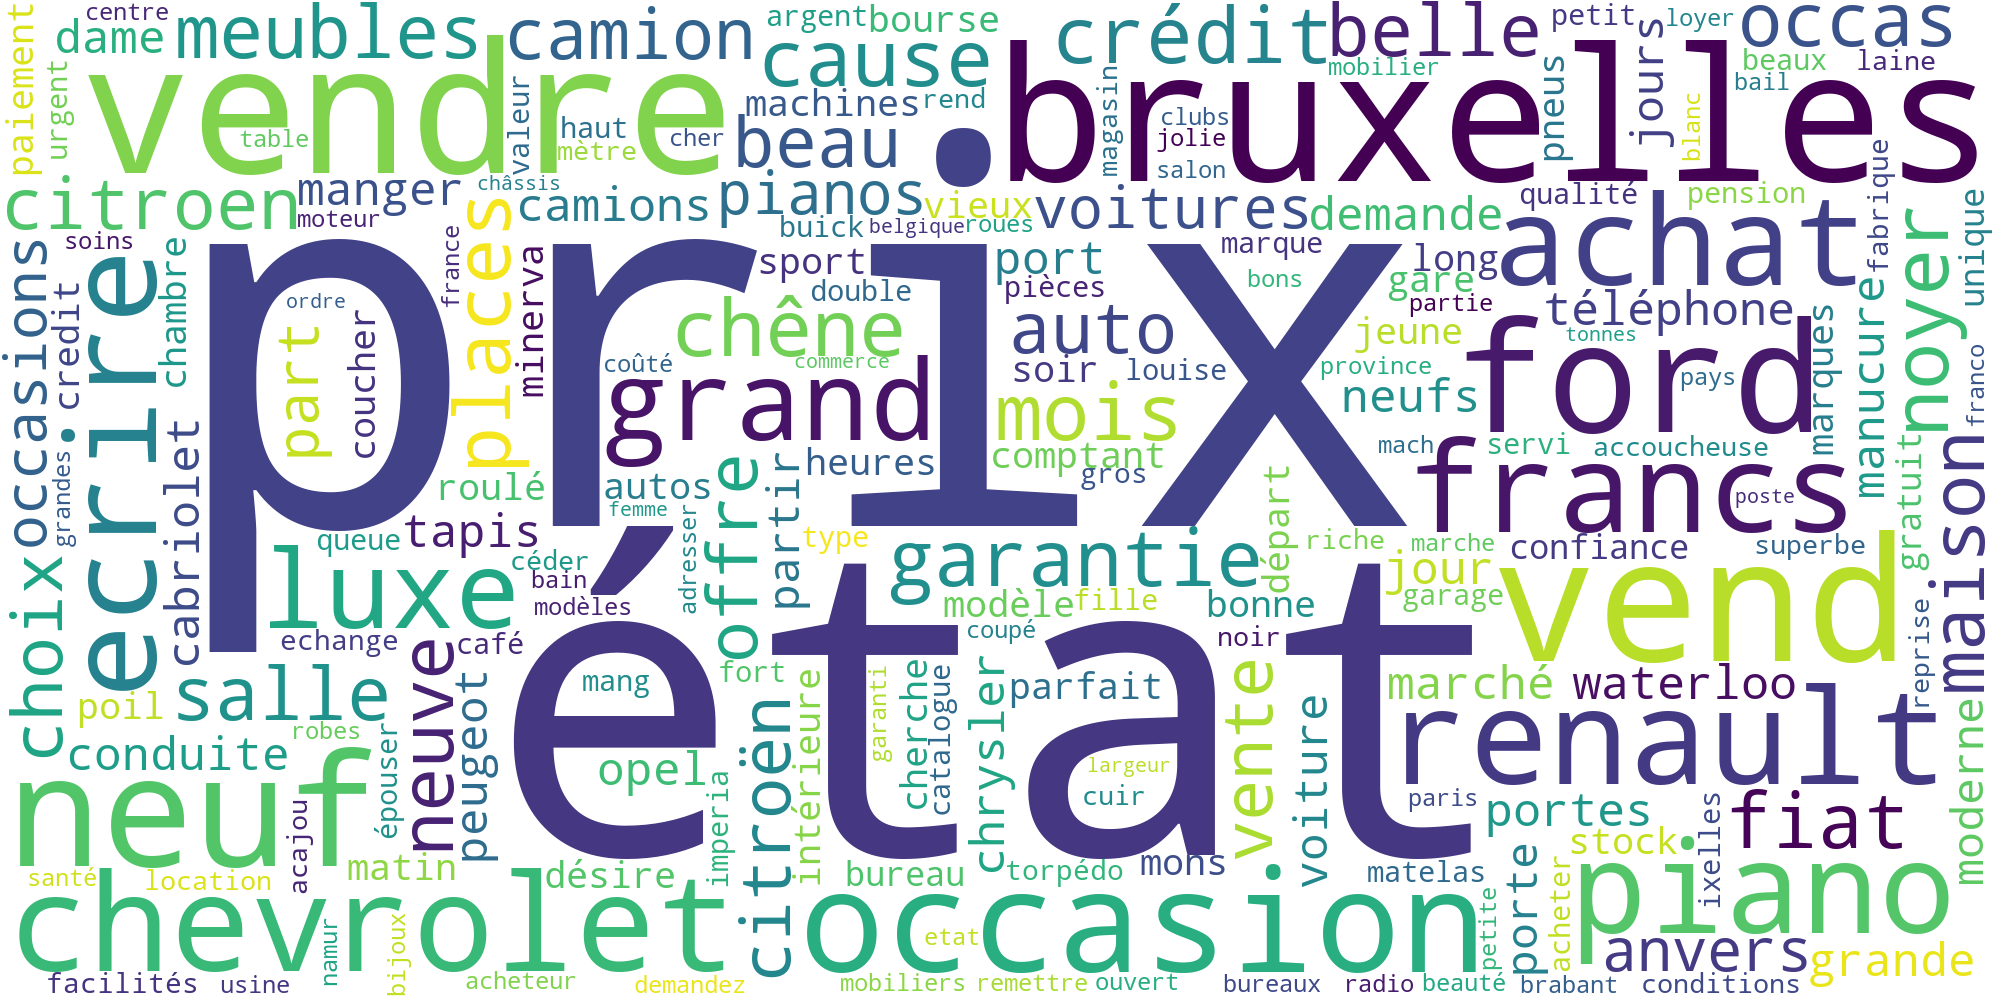

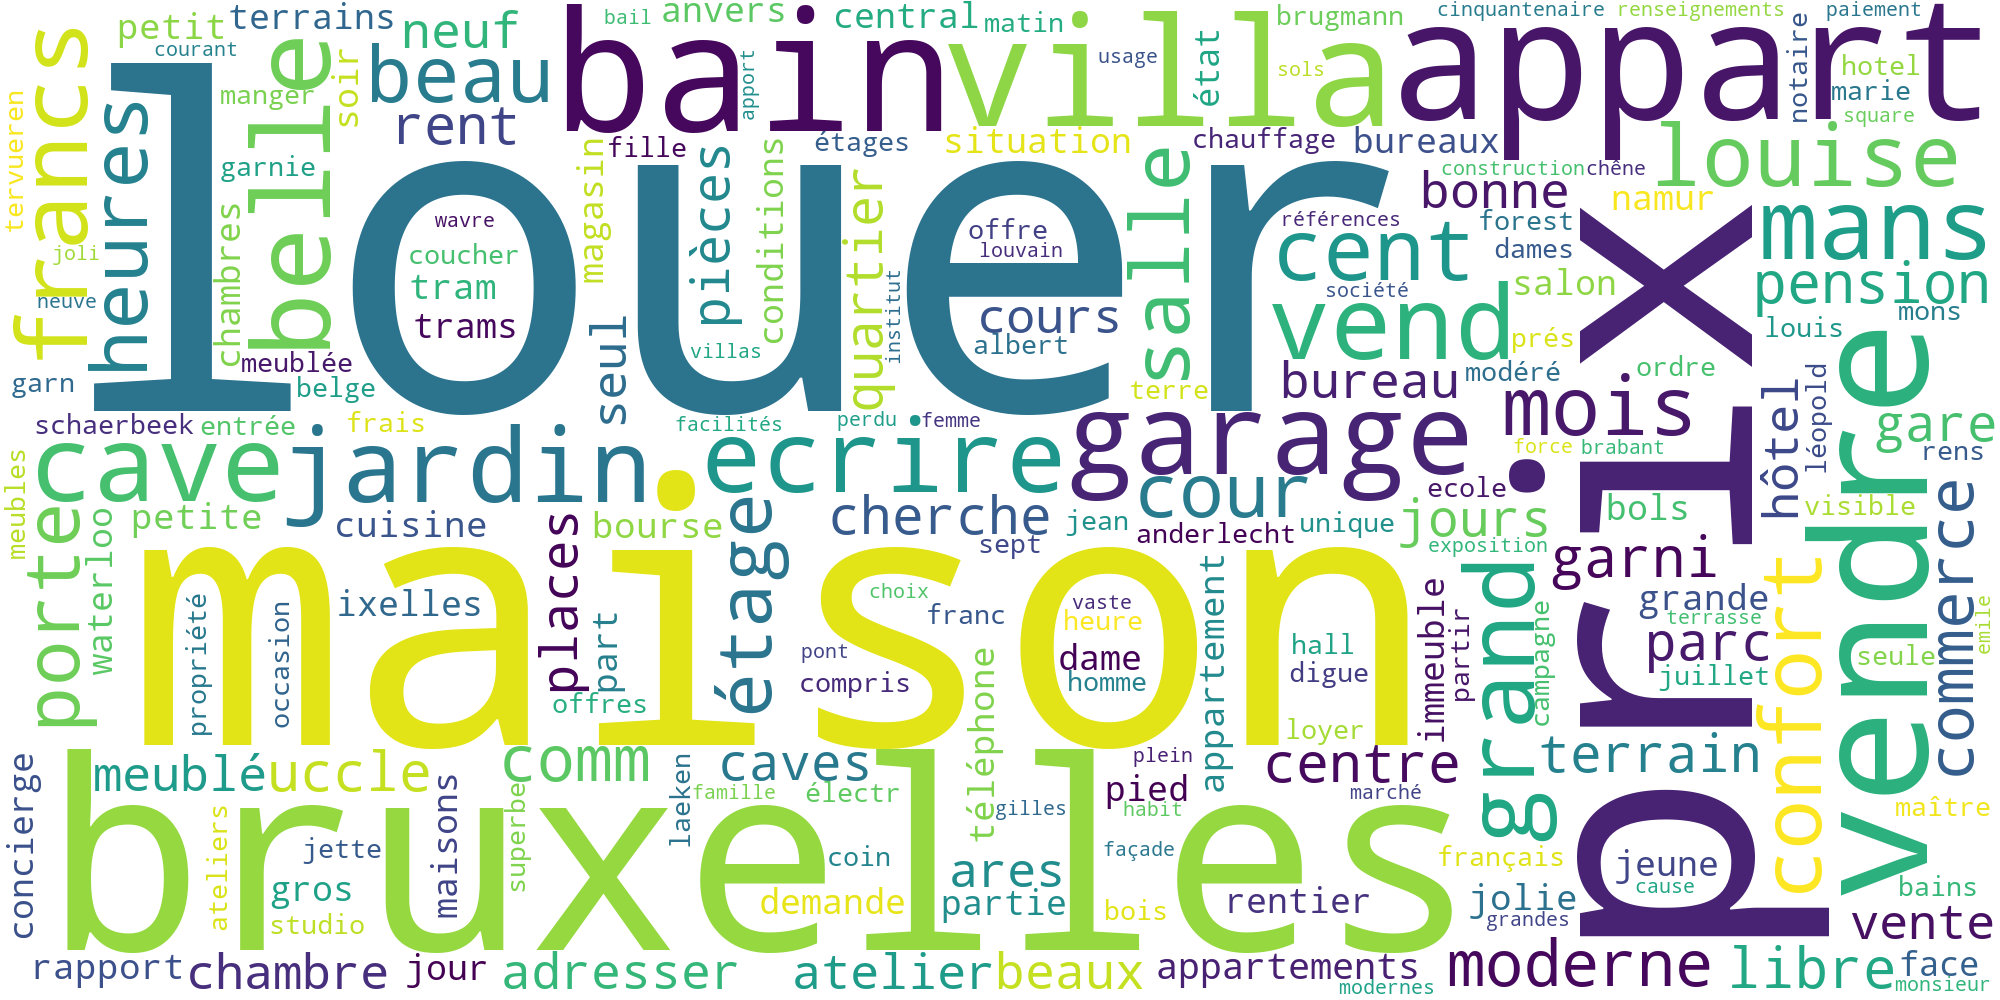

In [ ]:
# Solution ad hoc car il semble impossible d'intégrer facilement plusieurs images dans une même cellule d'un jupyer notebook

w = Image(filename=f'{temp_path}1930s_cluster_0.png')
x = Image(filename=f'{temp_path}1930s_cluster_1.png') 
y = Image(filename=f'{temp_path}1930s_cluster_2.png') 
z = Image(filename=f'{temp_path}1930s_cluster_3.png')
display(w, x, y, z)

# Word Embbeding avec Word2vec  Non supervise

## Imports

In [63]:
import pickle
import sys
import os

import pickle
import nltk
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser, Phrases
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

# config

temp_path = '../tp4/tmp/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

### Chargement et traitement des phrases du corpus

In [64]:
# Création d'un objet qui streame les lignes d'un fichier pour économiser de la RAM

class MySentences(object):
    """Tokenize and Lemmatize sentences""" # Permet de tokenizer des "doubles" mots, par ex "premier" + "ministre" va être considéré comme un token "premier ministre"
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

infile = f"../tp4/temp.txt"
sentences = MySentences(infile)

#### Détection des bigrams

In [66]:
# Création de l'objet 'phrases' = "dictionnaire d'expressions multi-mots associées à un score", 
# dont les clés correspondent aux termes du corpus

bigram_phrases = Phrases(sentences)

FileNotFoundError: [Errno 2] No such file or directory: '../tp4/temp.txt'

In [68]:
# Conversion des objets 'phrases' en objet 'phraser' = version light du 'phrases' -> convertit certains unigrams en bigrams s'ils sont pertinents

bigram_phraser = Phraser(phrases_model=bigram_phrases)

# Sauvegarder l'objet Phraser des bigrammes

with open(f"{temp_path}bigrams.p", 'wb') as f:
    pickle.dump(bigram_phraser, f)

NameError: name 'bigram_phrases' is not defined

#### Détection des trigrams

In [ ]:
# Ouvrir l'objet Phraser des bigrammes

bigram_phraser = pickle.load(open(f"{temp_path}bigrams.p", "rb"))

In [ ]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [ ]:
# Conversion en objet Phraser et sauvegarde du Phraser des trigrammes

trigram_phraser = Phraser(phrases_model=trigram_phrases)

with open(f"{temp_path}trigrams.p", 'wb') as f:
    pickle.dump(trigram_phraser, f)

#### Création d'un corpus d'unigrams, bigrams, trigrams

In [ ]:
bigram_phraser = pickle.load(open(f"{temp_path}bigrams.p", "rb"))
trigram_phraser = pickle.load(open(f"{temp_path}trigrams.p", "rb"))

In [ ]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

# Imprimer une liste de n-grammes, qu'on répère car ils sont séparés par des _

print(corpus[:100])

[['mi', 'imnri', 'r', 'i', '<<', 'i', 'i', 'hmu', "'", 'i', '/', 'tx', "-'", 'l', ':', 'marche', 'tenu', 'hors', 'villa', ',', 'la', '9', '.'], ['--', 'u', 'a', 'ete', 'vaain', 'si', 'teicj', '>>', 'm', 'races_indigenes', 'de', 'fr', '.'], ['31', '<)', 'a', '5s', "'", 'k', '131', 'de', '.'], ['rasa', 'iichakdui', "'", 'te', ',', 'do', '(', 'r', '.', '3s0', 'h', '710', '.', 'taureaux', 'iallsenas', ',>', 'ia', 'u', '\\', '--', 'a', '--', ';', '0ii', '.'], ['hollandais', ',', 'dufr', '.'], ['0', '.'], ['--', 'a', '9', '.--', 'la', 'idto', '-', 'vachei', 'laitieres', ':', 'bn', 'vante', '1q', '.'], ['vendues', '3', '\\', 'au', 'prix', 'la', '410', 'a', '*', '<<', 'i', 'h', '\\;', 'genisses', ',', 'kl', '.'], ["'.", '9', '.'], ['i', 'l', '.', '2', 'i', '.', 'id', '.'], ['da', '370', 'i', '6lutr', '.'], ['marche', 'a', '<', 'u', 'porcs', '.'], ['--', 'categorie', 'de', 'lt', 'ilashtya', ':', "'", '237', 'on', 'vente', ';', 'vendus', '1', 'm', '.', 'do', "'", '2', 'i', '.--', 'a', ';:,', 'l'

In [ ]:
# Sauvegarder cette liste dans le dossier temporaire
# disabled cause not working

# with open(f"{temp_path}ngram_corpus.p", 'wb') as f:
#    pickle.dump(corpus, f)

### Entraînement d'un modèle word2vec sur ce corpus

In [ ]:
# Charger la liste des n-grams
# disabled cause not working

# corpus = pickle.load(open("ngrams_list.p", "rb"))

In [ ]:
%%time
model = Word2Vec( # default parameters
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte" (avant/après le mot)
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 'min_count' fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en plusieurs threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs
)

# Sauver le modèle dans un fichier
outfile = f"{temp_path}newspapers_window5_mincount5.model"
model.save(outfile)

CPU times: total: 6min 53s
Wall time: 40min 29s


In [ ]:
%%time
model = Word2Vec( # smaller window, higher min_count
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=3, # La taille du "contexte" (avant/après le mot)
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 'min_count' fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en plusieurs threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs
)

# Sauver le modèle dans un fichier
outfile = f"{temp_path}newspapers_window3_mincount10.model"
model.save(outfile)

CPU times: total: 5min 47s
Wall time: 34min 51s


In [ ]:
%%time
model = Word2Vec( # higher min_count and window
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=10, # La taille du "contexte" (avant/après le mot)
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 'min_count' fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en plusieurs threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs
)

# Sauver le modèle dans un fichier
outfile = f"{temp_path}newspapers_window10_mincount10.model"
model.save(outfile)

CPU times: total: 6min 27s
Wall time: 31min 30s


In [ ]:
%%time
model = Word2Vec( # even higher min_count and window
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=20, # La taille du "contexte" (avant/après le mot)
    min_count=20, # On ignore les mots qui n'apparaissent pas au moins 'min_count' fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en plusieurs threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs
)

# Sauver le modèle dans un fichier
outfile = f"{temp_path}newspapers_window20_mincount20.model"
model.save(outfile)

CPU times: total: 7min 9s
Wall time: 23min 23s


### Exploration des modèles

Comme proposé dans les consignes du TP, j'ai créé plusieurs modèles en jouant sur les paramètres 'min_count' et 'window'. Je détaille les différences entre ces modèles dans le rapport.

In [ ]:
# Charger les modèles en mémoire dans une liste

models = []

models.append(Word2Vec.load(f"{temp_path}newspapers_window5_mincount5.model"))
models.append(Word2Vec.load(f"{temp_path}newspapers_window3_mincount10.model"))
models.append(Word2Vec.load(f"{temp_path}newspapers_window10_mincount10.model"))
models.append(Word2Vec.load(f"{temp_path}newspapers_window20_mincount20.model"))

nb_models = len(models)

In [ ]:
# Fonction "similarity" : Calculer la similarité entre deux termes

first_term = ["journaliste", "chaud", "appartement", "socialiste", "chanter", "arbre", "enseigner"] # première liste des mots
second_term = ["presse", "froid", "louer", "chretien", "citroen", "branche", "theologiens"] # seconde liste de mots
nb_similarity_examples = len(first_term)

for i in range (nb_similarity_examples) : # pour chaque exemple
    for j in range (nb_models): # pour chaque modèle
        print(f"'{first_term[i]}' et '{second_term[i]}' (modèle {j}) : {models[j].wv.similarity(first_term[i], second_term[i])}") # imprimer la similarité entre les deux mots issus des deux listes
    print("")

'journaliste' et 'presse' (modèle 0) : 0.2497072070837021
'journaliste' et 'presse' (modèle 1) : 0.23073068261146545
'journaliste' et 'presse' (modèle 2) : 0.2886613607406616
'journaliste' et 'presse' (modèle 3) : 0.343855082988739

'chaud' et 'froid' (modèle 0) : 0.7280045747756958
'chaud' et 'froid' (modèle 1) : 0.6839326620101929
'chaud' et 'froid' (modèle 2) : 0.7436212301254272
'chaud' et 'froid' (modèle 3) : 0.7467522025108337

'appartement' et 'louer' (modèle 0) : 0.6763496398925781
'appartement' et 'louer' (modèle 1) : 0.6020632982254028
'appartement' et 'louer' (modèle 2) : 0.7371500730514526
'appartement' et 'louer' (modèle 3) : 0.691918671131134

'socialiste' et 'chretien' (modèle 0) : 0.8494765758514404
'socialiste' et 'chretien' (modèle 1) : 0.8513742089271545
'socialiste' et 'chretien' (modèle 2) : 0.8594279289245605
'socialiste' et 'chretien' (modèle 3) : 0.8347303867340088

'chanter' et 'citroen' (modèle 0) : -0.16730761528015137
'chanter' et 'citroen' (modèle 1) : -0.2

In [ ]:
# Fonction "most_similar" : Chercher les mots les plus proches d'un terme donné

most_similar_word = ["peugeot", "enseigner", "rome", "bruxelles", "jardin", "habiter"] # liste de mots
nb_most_similar_examples = len(most_similar_word)

for i in range (nb_most_similar_examples) : # pour chaque exemple
    for j in range (nb_models): # pour chaque modèle
        print(f"Mots les plus semblables à '{most_similar_word[i]}' (modèle {j}) :", models[j].wv.most_similar(most_similar_word[i], topn=10)) # imprimer les mots les plus sembables au mot sélectionné
    print("")

Mots les plus semblables à 'peugeot' (modèle 0) : [('imperia', 0.9286518692970276), ('citroen', 0.9228317141532898), ('ford', 0.9175989031791687), ('opel', 0.9095059037208557), ('buick', 0.9083935618400574), ('minerva', 0.9041520357131958), ('skoda', 0.9018157124519348), ('chevrolet', 0.9011731147766113), ('mercedes', 0.9002424478530884), ('simca', 0.8955201506614685)]
Mots les plus semblables à 'peugeot' (modèle 1) : [('imperia', 0.9339192509651184), ('chrysler', 0.9255465269088745), ('citroen', 0.9190285801887512), ('simca', 0.9189803004264832), ('volkswagen', 0.918897807598114), ('ford', 0.9178043007850647), ('taunus', 0.9104763865470886), ('buick', 0.910352349281311), ('cadillac', 0.9095398783683777), ('opel', 0.9092620611190796)]
Mots les plus semblables à 'peugeot' (modèle 2) : [('citroen', 0.9472780227661133), ('ford', 0.9429683089256287), ('chevrolet', 0.9148492813110352), ('imperia', 0.9125781059265137), ('minerva', 0.9059906005859375), ('opel', 0.9050105810165405), ('trlumph'